### Data Exploration

In [77]:
import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder,OneHotEncoder

In [3]:
#load data
df = pd.read_csv('Employee.csv')

In [5]:
df

,Company,Age,Salary,Place,Country,Gender
0,TCS,20.0,NaN,Chennai,India,0
1,Infosys,30.0,NaN,Mumbai,India,0
2,TCS,35.0,2300.0,Calcutta,India,0
3,Infosys,40.0,3000.0,Delhi,India,0
4,TCS,23.0,4000.0,Mumbai,India,0
...,...,...,...,...,...,...
143,TCS,33.0,9024.0,Calcutta,India,1
144,Infosys,22.0,8787.0,Calcutta,India,1
145,Infosys,44.0,4034.0,Delhi,India,1
146,TCS,33.0,5034.0,Mumbai,India,1


In [7]:
#data exploration
#Shape of the dataset
df.shape

(148, 6)

In [9]:
df.head()

,Company,Age,Salary,Place,Country,Gender
0,TCS,20.0,NaN,Chennai,India,0
1,Infosys,30.0,NaN,Mumbai,India,0
2,TCS,35.0,2300.0,Calcutta,India,0
3,Infosys,40.0,3000.0,Delhi,India,0
4,TCS,23.0,4000.0,Mumbai,India,0


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148 entries, 0 to 147
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Company  140 non-null    object 
 1   Age      130 non-null    float64
 2   Salary   124 non-null    float64
 3   Place    134 non-null    object 
 4   Country  148 non-null    object 
 5   Gender   148 non-null    int64  
dtypes: float64(2), int64(1), object(3)
memory usage: 7.1+ KB


In [13]:
df.count()

Company    140
Age        130
Salary     124
Place      134
Country    148
Gender     148
dtype: int64

In [15]:
#unique values in each feature
print("\nUnique values in each Column:")
for col in df.columns:
    print(f"{col}:{len(df[col].unique())} unique values")


Unique values in each Column:
Company:7 unique values
Age:30 unique values
Salary:41 unique values
Place:12 unique values
Country:1 unique values
Gender:2 unique values


In [17]:
#stastistical analysis
df.describe(include = 'all')

,Company,Age,Salary,Place,Country,Gender
count,140,130.000000,124.000000,134,148,148.000000
unique,6,NaN,NaN,11,1,NaN
top,TCS,NaN,NaN,Mumbai,India,NaN
freq,53,NaN,NaN,37,148,NaN
mean,NaN,30.484615,5312.467742,NaN,NaN,0.222973
std,NaN,11.096640,2573.764683,NaN,NaN,0.417654
min,NaN,0.000000,1089.000000,NaN,NaN,0.000000
25%,NaN,22.000000,3030.000000,NaN,NaN,0.000000
50%,NaN,32.500000,5000.000000,NaN,NaN,0.000000
75%,NaN,37.750000,8000.000000,NaN,NaN,0.000000


In [19]:
# Renaming the columns
df= df.rename(columns={'Company':'IT Company',
                       'Place':'City'})
df

,IT Company,Age,Salary,City,Country,Gender
0,TCS,20.0,NaN,Chennai,India,0
1,Infosys,30.0,NaN,Mumbai,India,0
2,TCS,35.0,2300.0,Calcutta,India,0
3,Infosys,40.0,3000.0,Delhi,India,0
4,TCS,23.0,4000.0,Mumbai,India,0
...,...,...,...,...,...,...
143,TCS,33.0,9024.0,Calcutta,India,1
144,Infosys,22.0,8787.0,Calcutta,India,1
145,Infosys,44.0,4034.0,Delhi,India,1
146,TCS,33.0,5034.0,Mumbai,India,1


### Data Cleaning

In [25]:
print("Missing/Null values in each column:")
print('\t')
Missing_values = df.isnull().sum()
Missing_values


Missing/Null values in each column:
	


IT Company     8
Age           18
Salary        24
City          14
Country        0
Gender         0
dtype: int64

In [27]:
print("Duplicate values in the dataset:")
print('\t')
df.duplicated().sum()

Duplicate values in the dataset:
	


4

In [29]:
df.shape

(148, 6)

In [33]:
df.drop_duplicates(inplace=True)
df

,IT Company,Age,Salary,City,Country,Gender
0,TCS,20.0,NaN,Chennai,India,0
1,Infosys,30.0,NaN,Mumbai,India,0
2,TCS,35.0,2300.0,Calcutta,India,0
3,Infosys,40.0,3000.0,Delhi,India,0
4,TCS,23.0,4000.0,Mumbai,India,0
...,...,...,...,...,...,...
142,Infosys Pvt Lmt,22.0,8202.0,Mumbai,India,0
143,TCS,33.0,9024.0,Calcutta,India,1
145,Infosys,44.0,4034.0,Delhi,India,1
146,TCS,33.0,5034.0,Mumbai,India,1


In [35]:
print("Replacing 0 with NaN values in the age column")
print('\t')
df['Age'] = df['Age'].replace(0,np.nan)
df

Replacing 0 with NaN values in the age column
	


,IT Company,Age,Salary,City,Country,Gender
0,TCS,20.0,NaN,Chennai,India,0
1,Infosys,30.0,NaN,Mumbai,India,0
2,TCS,35.0,2300.0,Calcutta,India,0
3,Infosys,40.0,3000.0,Delhi,India,0
4,TCS,23.0,4000.0,Mumbai,India,0
...,...,...,...,...,...,...
142,Infosys Pvt Lmt,22.0,8202.0,Mumbai,India,0
143,TCS,33.0,9024.0,Calcutta,India,1
145,Infosys,44.0,4034.0,Delhi,India,1
146,TCS,33.0,5034.0,Mumbai,India,1


In [37]:
print("Replacing missing values in the numerical coilumns with media and mode")
print('\t')
df['Age'] = df['Age'].fillna(df['Age'].median())
df['Salary'] = df['Salary'].fillna(df['Salary'].median())
df

Replacing missing values in the numerical coilumns with media and mode
	


,IT Company,Age,Salary,City,Country,Gender
0,TCS,20.0,5000.0,Chennai,India,0
1,Infosys,30.0,5000.0,Mumbai,India,0
2,TCS,35.0,2300.0,Calcutta,India,0
3,Infosys,40.0,3000.0,Delhi,India,0
4,TCS,23.0,4000.0,Mumbai,India,0
...,...,...,...,...,...,...
142,Infosys Pvt Lmt,22.0,8202.0,Mumbai,India,0
143,TCS,33.0,9024.0,Calcutta,India,1
145,Infosys,44.0,4034.0,Delhi,India,1
146,TCS,33.0,5034.0,Mumbai,India,1


In [39]:
print("Replacing missing values in the categorical columns with mode")
print('\t')
df['IT Company'] = df['IT Company'].fillna(df['IT Company'].mode()[0])
df['City'] = df['City'].fillna(df['City'].mode()[0])
df['Gender'] = df['Gender'].fillna(df['Gender'].mode()[0])
df

Replacing missing values in the categorical columns with mode
	


,IT Company,Age,Salary,City,Country,Gender
0,TCS,20.0,5000.0,Chennai,India,0
1,Infosys,30.0,5000.0,Mumbai,India,0
2,TCS,35.0,2300.0,Calcutta,India,0
3,Infosys,40.0,3000.0,Delhi,India,0
4,TCS,23.0,4000.0,Mumbai,India,0
...,...,...,...,...,...,...
142,Infosys Pvt Lmt,22.0,8202.0,Mumbai,India,0
143,TCS,33.0,9024.0,Calcutta,India,1
145,Infosys,44.0,4034.0,Delhi,India,1
146,TCS,33.0,5034.0,Mumbai,India,1


Boxplot Graph to visualize outliers in Age and Salary columns
	


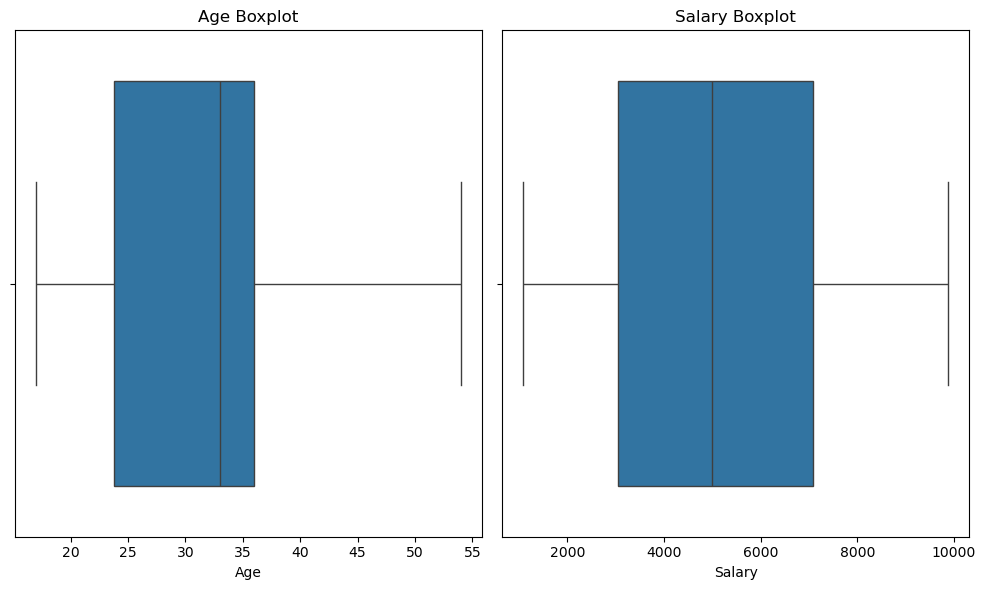

In [43]:
print("Boxplot Graph to visualize outliers in Age and Salary columns")
print('\t')
plt.figure(figsize = (10,6))

#plot for Age
plt.subplot(1,2,1)
sns.boxplot(x=df['Age'])
plt.title('Age Boxplot')
plt.xlabel('Age')

#plot for Salary
plt.subplot(1,2,2)
sns.boxplot(x=df['Salary'])
plt.title('Salary Boxplot')
plt.xlabel('Salary')

#show the plots
plt.tight_layout()
plt.show()

In [47]:
print("Using IQR Method to determine outliers in the Age column")
print('\t')
Q1_age = df['Age'].quantile(0.25)
Q3_age = df['Age'].quantile(0.75)

IQR_age = Q3_age - Q1_age

#calculate the lower and upper bounds for outliers in 'age'

lower_bound_age = Q1_age - 1.5 * IQR_age
upper_bound_age = Q3_age + 1.5 * IQR_age

#Identify outliers in the 'age' column
age_outliers = df[(df['Age'] < lower_bound_age) | (df['Age'] > upper_bound_age)]

print("Using IQR Method to determine outliers in the Salary column")
print('\t')
Q1_salary = df['Salary'].quantile(0.25)
Q3_salary = df['Salary'].quantile(0.75)
IQR_salary = Q3_salary - Q1_salary

#calculate the lower anf upper bounds for outliers in 'Salary'
lower_bound_salary = Q1_salary - 1.5 * IQR_salary
upper_bound_salary = Q3_salary + 1.5 * IQR_salary

#identify the outliers in the 'salary' column
salary_outliers = df[(df['Salary'] <lower_bound_salary) | (df['Salary'] > upper_bound_salary)]

#display the outliers in Age and Salary Columns
print("Outliers in Age:")
print(age_outliers)
print("\n")
print("outliers in salary:")
print(salary_outliers)

                                                           


Using IQR Method to determine outliers in the Age column
	
Using IQR Method to determine outliers in the Salary column
	
Outliers in Age:
Empty DataFrame
Columns: [IT Company, Age, Salary, City, Country, Gender]
Index: []


outliers in salary:
Empty DataFrame
Columns: [IT Company, Age, Salary, City, Country, Gender]
Index: []


#### There is no outliers in Age and Salary columns.

### Data Analysis

In [51]:
# Filter the data with age >40 and salary<5000.

print("Filtered data of employees with age >40 and salary <5000")
print('\t')
filtered_data = df[(df['Age'] >40) & (df['Salary'] <5000)]
filtered_data

Filtered data of employees with age >40 and salary <5000
	


,IT Company,Age,Salary,City,Country,Gender
21,Infosys,50.0,3184.0,Delhi,India,0
32,Infosys,45.0,4034.0,Calcutta,India,0
39,Infosys,41.0,3000.0,Mumbai,India,0
50,Infosys,41.0,3000.0,Chennai,India,0
57,Infosys,51.0,3184.0,Hyderabad,India,0
68,Infosys,43.0,4034.0,Mumbai,India,0
75,Infosys,44.0,3000.0,Cochin,India,0
86,Infosys,41.0,3000.0,Delhi,India,0
93,Infosys,54.0,3184.0,Mumbai,India,0
104,Infosys,44.0,4034.0,Delhi,India,0


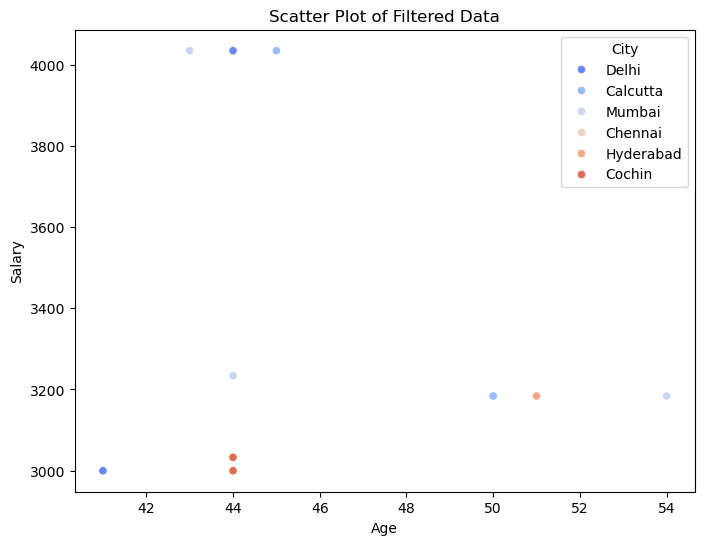

In [55]:
#plot chart with age and salary
plt.figure(figsize=(8,6))
sns.scatterplot(data=filtered_data, x='Age', y='Salary', hue='City',palette='coolwarm')
plt.title('Scatter Plot of Filtered Data')
plt.xlabel('Age')
plt.ylabel('Salary')
plt.legend(title='City')
plt.show()

In [57]:
#count the number of people from each place and represent it visually

print("Count of employees from each city")
print('\t')
city_counts = df['City'].value_counts()
city_counts

Count of employees from each city
	


City
Mumbai        48
Calcutta      32
Chennai       14
Delhi         14
Cochin        13
Noida          8
Hyderabad      8
Podicherry     3
Pune           2
Bhopal         1
Nagpur         1
Name: count, dtype: int64

C:\Users\henna\AppData\Local\Temp\ipykernel_17884\3523147692.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x= city_counts.index, y= city_counts.values, palette = 'coolwarm')


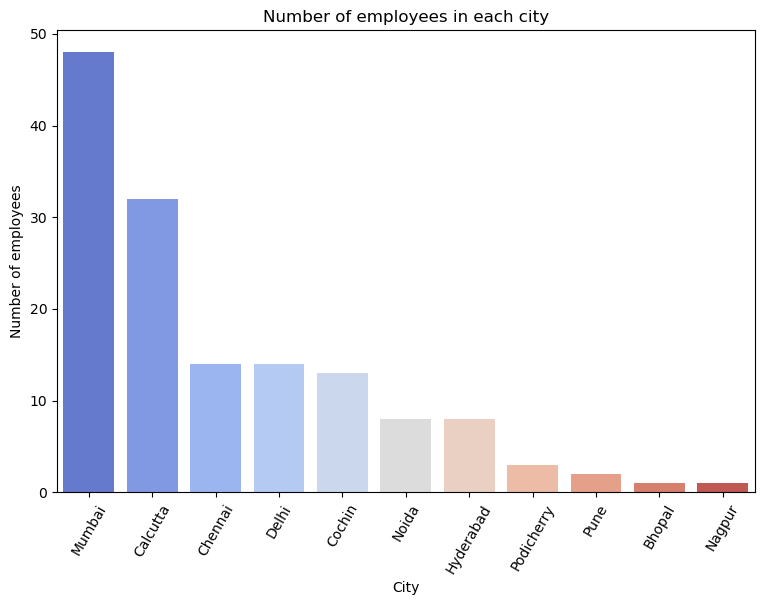

In [59]:
plt.figure(figsize=(9,6))
sns.barplot(x= city_counts.index, y= city_counts.values, palette = 'coolwarm')
plt.title('Number of employees in each city')
plt.xlabel('City')
plt.ylabel('Number of employees')
plt.xticks(rotation = 60)
plt.show()

### Data Encoding

In [64]:
print("Output after label encoding ")
print('\t')
from sklearn.preprocessing import LabelEncoder
#identify categorical variables 
categorical_columns =['Company','City','Country','Gender']

#Initialize LabelEncoder for Gender column 
label_encoder = LabelEncoder()

#Apply label encoding for 'city'
df['City'] = label_encoder.fit_transform(df['City'])

#apply label encoding for Country
df['Country'] = label_encoder.fit_transform(df['Country'])

#Display the first few rows of the encoded dataframe
print(df.head(15))

Output after label encoding 
	
   IT Company   Age  Salary  City  Country  Gender
0         TCS  20.0  5000.0     2        0       0
1     Infosys  30.0  5000.0     6        0       0
2         TCS  35.0  2300.0     1        0       0
3     Infosys  40.0  3000.0     4        0       0
4         TCS  23.0  4000.0     6        0       0
5     Infosys  33.0  5000.0     1        0       0
6         TCS  33.0  6000.0     2        0       1
7     Infosys  23.0  7000.0     6        0       1
8         TCS  34.0  8000.0     1        0       1
9         CTS  45.0  9000.0     4        0       0
10        CTS  23.0  5000.0     6        0       0
11        CTS  34.0  1089.0     1        0       0
12        CTS  45.0  5000.0     2        0       0
13        CTS  18.0  1234.0     6        0       0
14    Infosys  40.0  3000.0     1        0       0


In [70]:
print("Output after One Hot Encoding")
print('\t')
from sklearn.preprocessing import OneHotEncoder

#identify categorical variables
categorical_columns = ['IT Company','City','Country','Gender']

#Apply one-Hot Encoding using pd.get_dummies for 'Company','Place','Country_name' columns 
data_encoded = pd.get_dummies(df, columns=['IT Company','City','Country','Gender'],drop_first=True)

#display the first few rows of the encoded dataframe
print(data_encoded.head())

Output after One Hot Encoding
	
    Age  Salary  IT Company_Congnizant  IT Company_Infosys  \
0  20.0  5000.0                  False               False   
1  30.0  5000.0                  False                True   
2  35.0  2300.0                  False               False   
3  40.0  3000.0                  False                True   
4  23.0  4000.0                  False               False   

   IT Company_Infosys Pvt Lmt  IT Company_TCS  \
0                       False            True   
1                       False           False   
2                       False            True   
3                       False           False   
4                       False            True   

   IT Company_Tata Consultancy Services  City_1  City_2  City_3  City_4  \
0                                 False   False    True   False   False   
1                                 False   False   False   False   False   
2                                 False    True   False   False   False   


### Feature Scaling

In [91]:
scaler = StandardScaler()
df[['Age','Salary']] = scaler.fit_transform(df[['Age','Salary']])

ValueError: Found array with 0 sample(s) (shape=(0, 2)) while a minimum of 1 is required by StandardScaler.

In [93]:
minmax_scaler = MinMaxScaler()
df[['Age','salary']] = minmax_scaler.fit_transform(df[['Age','Salary']])

ValueError: Found array with 0 sample(s) (shape=(0, 2)) while a minimum of 1 is required by MinMaxScaler.

In [97]:
df.shape

(0, 6)

In [101]:
df.to_csv("cleaned_employeedataset.csv",index=False)